In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import time
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
%matplotlib inline

C:\local\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Load the data

In [2]:

x = np.load('overnight_all_compressed.npz')

Divide each patient data into a dataframe to understand different patient behaviours over night

In [3]:
data=['seconds','mic (trachea)','abdominal movement (stretch sensor)','thorax movement (stretch sensor)']
data_test=['seconds','thorax movement (stretch sensor)','abdominal movement (stretch sensor)','mic (right of trachea)','mic 2 (left of trachea)','mic (trachea)',]

start_time = time.clock()
#for files in x:
overnight_file1 = pd.DataFrame(x['arr_0'], columns = data)
overnight_file2 = pd.DataFrame(x['arr_1'], columns = data)
overnight_file3 = pd.DataFrame(x['arr_2'], columns = data_test)
print(time.clock() - start_time, "seconds")

3.8852444 seconds


In [35]:
#overnight_file2.set_index('seconds')
overnight_file2.index=pd.DatetimeIndex(overnight_file2['seconds'])


Patient 1 data analysis

In [20]:
overnight_file1['abdominal movement (stretch sensor)'].describe()

count    1.104451e+07
mean     1.639117e+00
std      6.235855e-01
min      7.251770e-01
25%      8.131990e-01
50%      2.105514e+00
75%      2.123518e+00
max      4.096000e+00
Name: abdominal movement (stretch sensor), dtype: float64

In [5]:
overnight_file1['thorax movement (stretch sensor)'].describe()

count    1.104451e+07
mean     1.873893e+00
std      3.006289e-01
min      6.271530e-01
25%      1.813443e+00
50%      2.025495e+00
75%      2.039498e+00
max      2.333570e+00
Name: thorax movement (stretch sensor), dtype: float64

In [6]:
overnight_file1['mic (trachea)'].describe()

count    1.104451e+07
mean     1.247501e+00
std      4.024806e-02
min      7.002000e-03
25%      1.227300e+00
50%      1.247305e+00
75%      1.267309e+00
max      4.083997e+00
Name: mic (trachea), dtype: float64

In [30]:
l=overnight_file2.shape[0]
print(l)
overnight_file2['abdominal movement (stretch sensor)'][:l//2].describe()


4769867


count    2.384933e+06
mean     2.222679e+00
std      8.121126e-02
min      1.225299e+00
25%      2.191535e+00
50%      2.239547e+00
75%      2.261552e+00
max      2.445597e+00
Name: abdominal movement (stretch sensor), dtype: float64

In [31]:
overnight_file2['abdominal movement (stretch sensor)'][l//2:].describe()

count    2.384934e+06
mean     2.213342e+00
std      2.367643e-02
min      1.269310e+00
25%      2.203538e+00
50%      2.211540e+00
75%      2.217541e+00
max      2.465602e+00
Name: abdominal movement (stretch sensor), dtype: float64

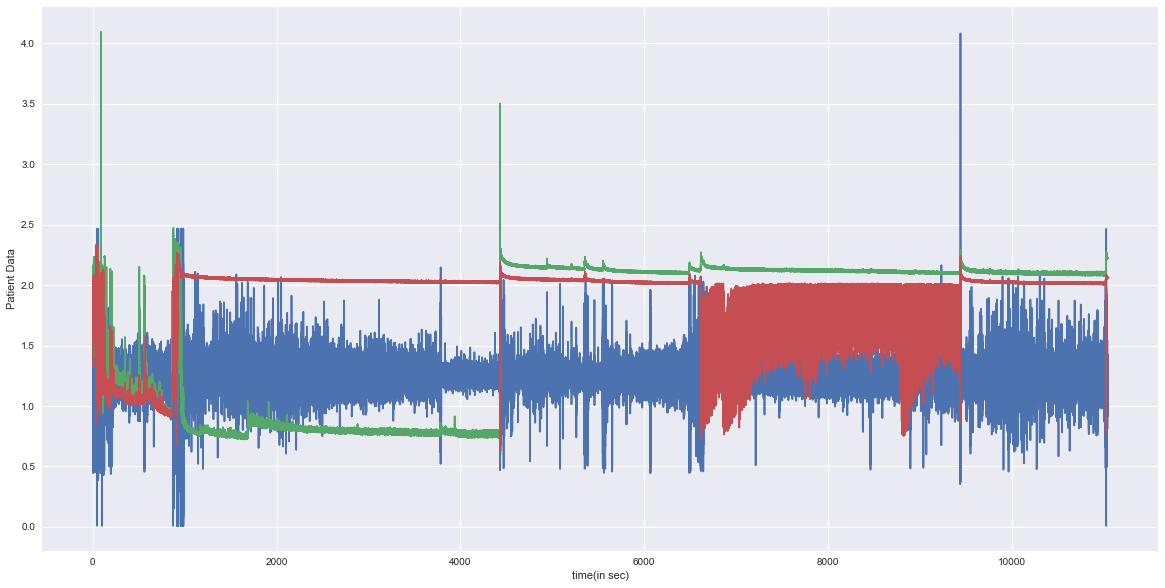

In [7]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.plot(overnight_file1['seconds'],overnight_file1['mic (trachea)'],label='mic (trachea)')
ax.plot(overnight_file1['seconds'],overnight_file1['abdominal movement (stretch sensor)'],label='abdominal movement (stretch sensor)')
ax.plot(overnight_file1['seconds'],overnight_file1['thorax movement (stretch sensor)'],label='thorax movement (stretch sensor)')
#ax.set_xlim(0,100,1000)
ax.set_ylabel('Patient Data')
ax.set_xlabel('time(in sec)')

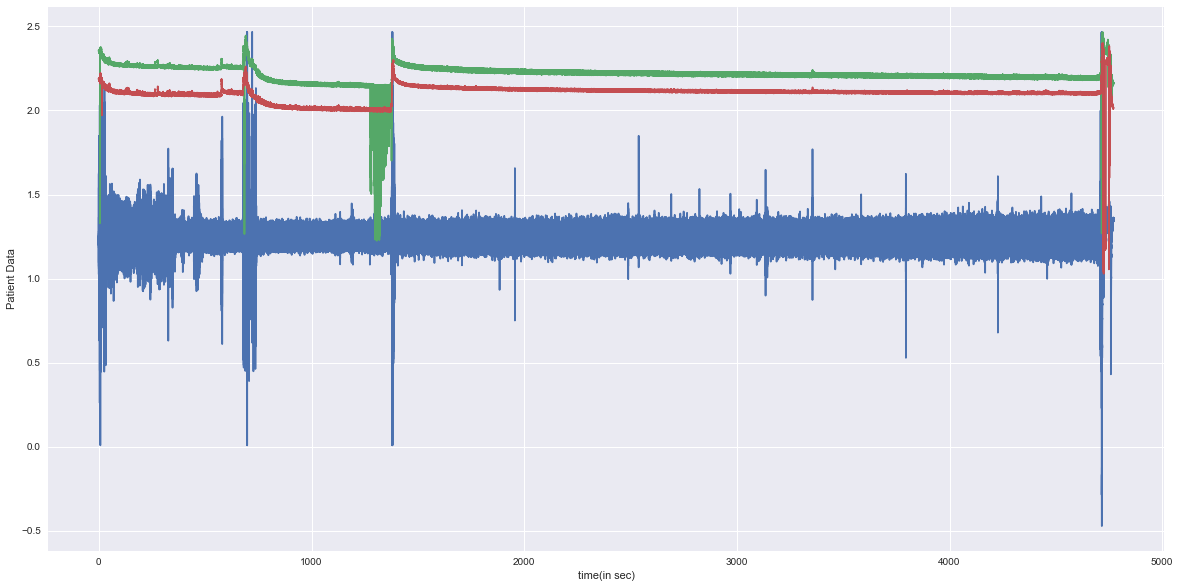

In [8]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.plot(overnight_file2['seconds'],overnight_file2['mic (trachea)'],label='mic (trachea)')
ax.plot(overnight_file2['seconds'],overnight_file2['abdominal movement (stretch sensor)'],label='abdominal movement (stretch sensor)')
ax.plot(overnight_file2['seconds'],overnight_file2['thorax movement (stretch sensor)'],label='thorax movement (stretch sensor)')
#ax.set_xlim(0,100,1000)
ax.set_ylabel('Patient Data')
ax.set_xlabel('time(in sec)')

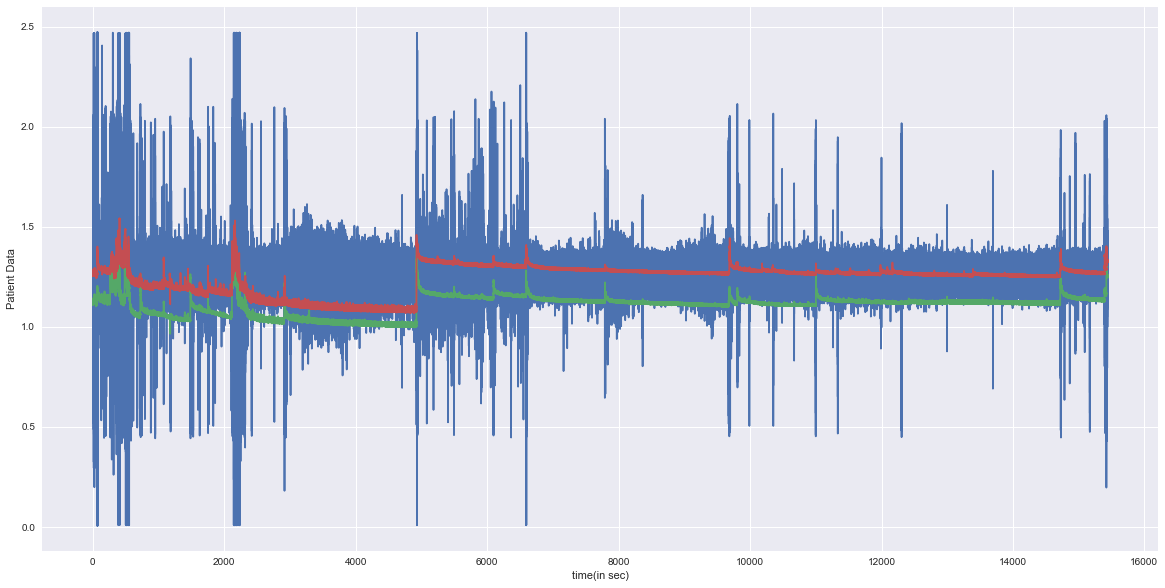

In [9]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.plot(overnight_file3['seconds'],overnight_file3['mic (trachea)'],label='mic (trachea)')
ax.plot(overnight_file3['seconds'],overnight_file3['abdominal movement (stretch sensor)'],label='abdominal movement (stretch sensor)')
ax.plot(overnight_file3['seconds'],overnight_file3['thorax movement (stretch sensor)'],label='thorax movement (stretch sensor)')
#ax.set_xlim(0,100,1000)
ax.set_ylabel('Patient Data')
ax.set_xlabel('time(in sec)')

In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=100000)
    rolstd = pd.rolling_std(timeseries, window=100000)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
   

In [7]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(overnight_file3['thorax movement (stretch sensor)'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:


MemoryError: 

C:\local\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100000,center=False).mean()
  """
C:\local\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100000,center=False).std()
  


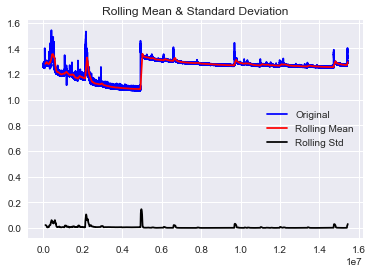

In [9]:
test_stationarity(overnight_file3['thorax movement (stretch sensor)'])

C:\local\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100000,center=False).mean()
  """
C:\local\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100000,center=False).std()
  


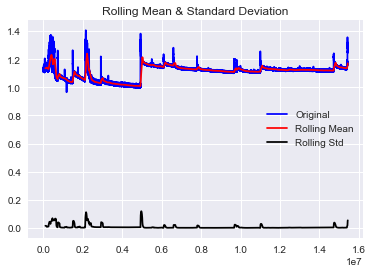

In [10]:
test_stationarity(overnight_file3['abdominal movement (stretch sensor)'])

In [45]:
ts_log=np.log(overnight_file2['abdominal movement (stretch sensor)'])

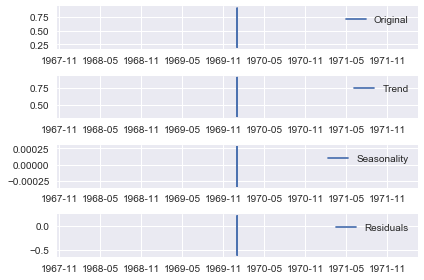

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=1000)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [15]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4565432821717720948
]


In [61]:
def get_a_sample(interval,start):
    samplingFrequency=1000
    sample = overnight_file1[:][start*samplingFrequency:samplingFrequency*(start+interval)]
    
    return sample

In [63]:
get_a_sample(2,5600)['mic (trachea)'] # to get x_
#print(x)

5600000    1.253306
5600001    1.221298
5600002    1.217297
5600003    1.207295
5600004    1.255306
5600005    1.255306
5600006    1.275311
5600007    1.227300
5600008    1.273311
5600009    1.235302
5600010    1.273311
5600011    1.251305
5600012    1.235302
5600013    1.219298
5600014    1.265309
5600015    1.257307
5600016    1.225299
5600017    1.265309
5600018    1.233301
5600019    1.257307
5600020    1.215297
5600021    1.257307
5600022    1.235302
5600023    1.231301
5600024    1.267309
5600025    1.221298
5600026    1.271310
5600027    1.253306
5600028    1.229300
5600029    1.229300
             ...   
5601970    1.329324
5601971    1.287314
5601972    1.287314
5601973    1.221298
5601974    1.199293
5601975    1.265309
5601976    1.241303
5601977    1.195292
5601978    1.299317
5601979    1.189290
5601980    1.283313
5601981    1.275311
5601982    1.331325
5601983    1.171286
5601984    1.315321
5601985    1.327324
5601986    1.161283
5601987    1.243304
5601988    1.301318


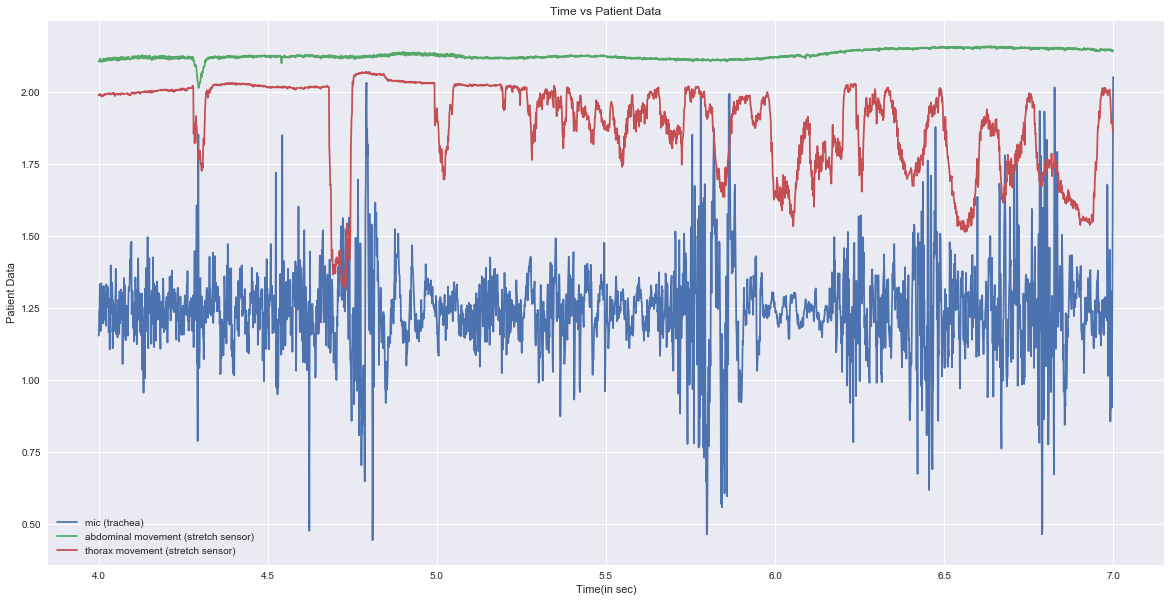

In [57]:
#Plot graph based on time interval(interval length in sec,start time in sec)

def plotOvernightData(interval,start):
    samplingFrequency=1000
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1,1,1)
    ax.set_title('Time vs Patient Data')
    ax.set_xlabel('Time(in sec)')
    ax.set_ylabel('Patient Data')
    ax.plot(overnight_file1['seconds'][start*samplingFrequency:samplingFrequency*(start+interval)],overnight_file1['mic (trachea)'][start*samplingFrequency:samplingFrequency*(start+interval)],label='mic (trachea)')
    ax.plot(overnight_file1['seconds'][start*samplingFrequency:samplingFrequency*(start+interval)],overnight_file1['abdominal movement (stretch sensor)'][start*samplingFrequency:samplingFrequency*(start+interval)],label='abdominal movement (stretch sensor)')
    ax.plot(overnight_file1['seconds'][start*samplingFrequency:samplingFrequency*(start+interval)],overnight_file1['thorax movement (stretch sensor)'][start*samplingFrequency:samplingFrequency*(start+interval)],label='thorax movement (stretch sensor)')

    ax.legend()
    
plotOvernightData(3,4)

In [7]:
day1 = x['arr_0']

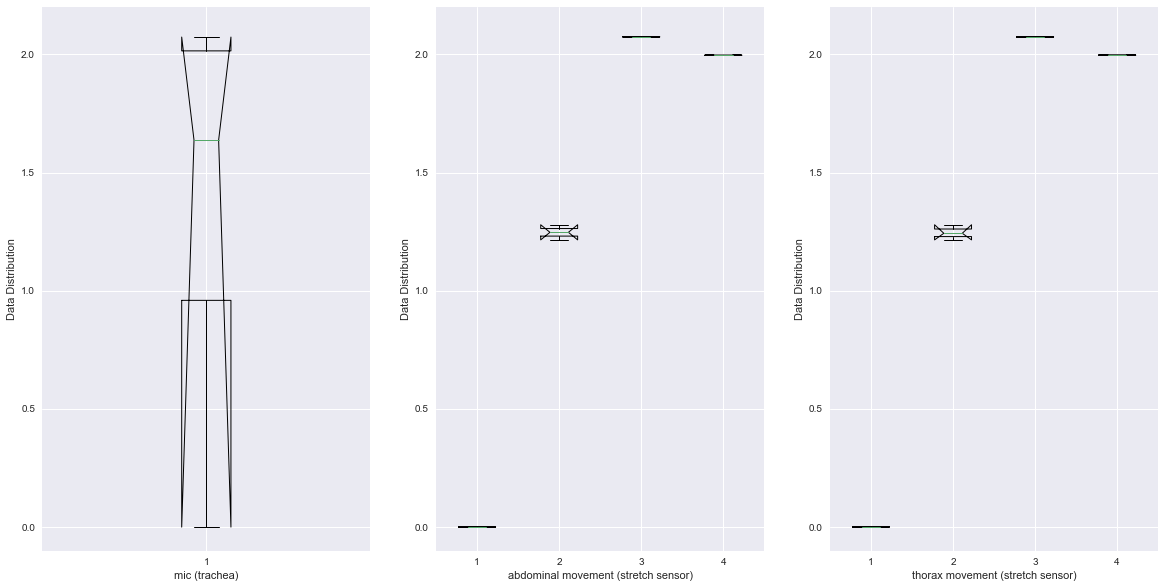

In [9]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,3,1)
ax.boxplot(day1[:1],notch=True, bootstrap=1000)
ax.set_ylim(-0.1,2.2)
ax.set_xlabel('mic (trachea)')
ax.set_ylabel('Data Distribution')

ax = fig.add_subplot(1,3,2)
ax.boxplot(day1[:2],notch=True, bootstrap=1000)
ax.set_ylim(-0.1,2.2)
ax.set_xlabel('abdominal movement (stretch sensor)')
ax.set_ylabel('Data Distribution')

ax = fig.add_subplot(1,3,3)
ax.boxplot(day1[:3],notch=True, bootstrap=1000)
ax.set_ylim(-0.1,2.2)
ax.set_xlabel('thorax movement (stretch sensor)')
ax.set_ylabel('Data Distribution')

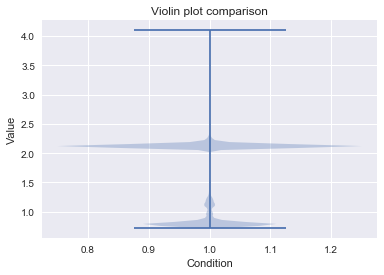

In [11]:
x = day1[:,2]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.violinplot([x])
ax.set_xlabel("Condition")
ax.set_ylabel("Value")
ax.set_title("Violin plot comparison")

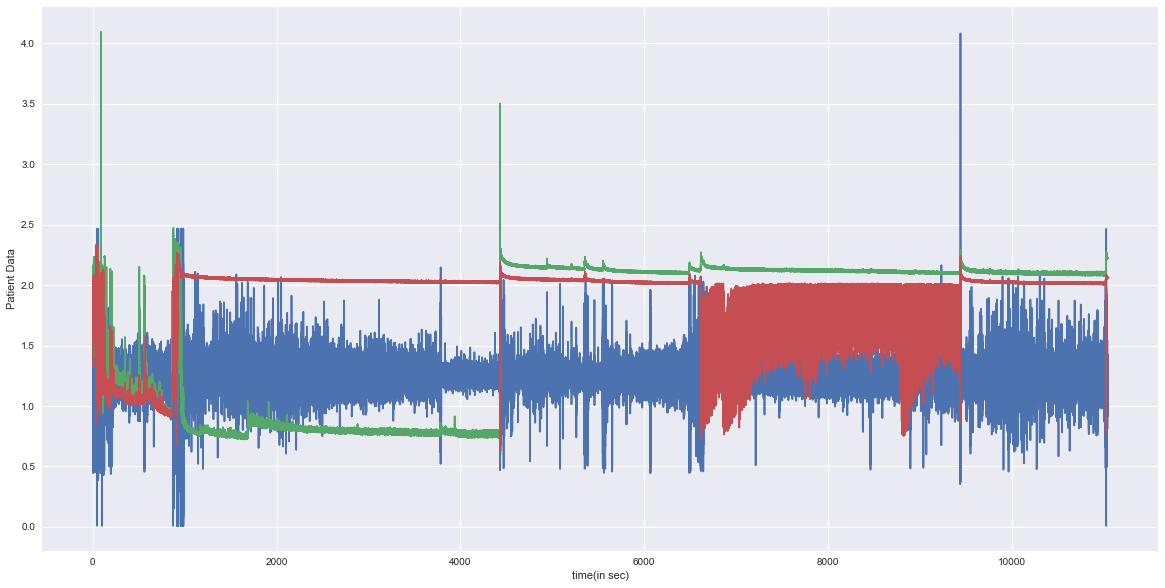

In [12]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.plot(day1[:,0],day1[:,1],label='mic (trachea)')
ax.plot(day1[:,0],day1[:,2],label='abdominal movement (stretch sensor)')
ax.plot(day1[:,0],day1[:,3],label='thorax movement (stretch sensor)')
#ax.set_xlim(0,100,1000)
ax.set_ylabel('Patient Data')
ax.set_xlabel('time(in sec)')

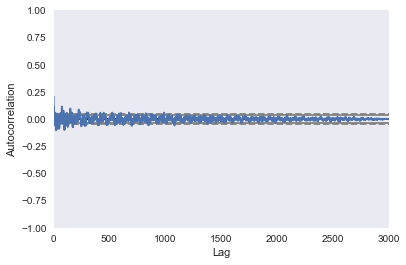

In [64]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(get_a_sample(3,800)[['mic (trachea)']])




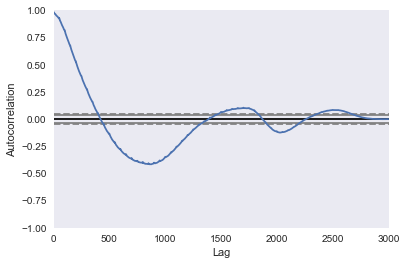

In [65]:
autocorrelation_plot(get_a_sample(3,900)['abdominal movement (stretch sensor)'])

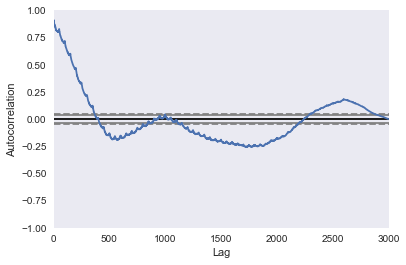

In [66]:
autocorrelation_plot(get_a_sample(3,0)['thorax movement (stretch sensor)'])

In [51]:
from pandas.plotting import 

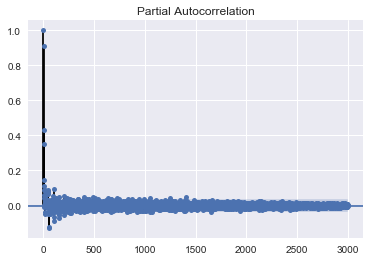

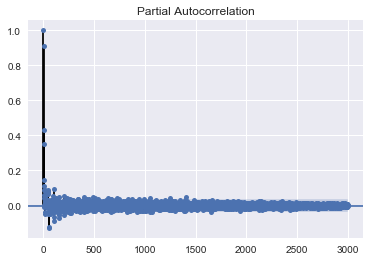

In [67]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(get_a_sample(3,0)['thorax movement (stretch sensor)'])